In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Exploratory

In [48]:
import os
import pandas as pd

path2data="/content/drive/MyDrive/iChallenge-AMD dataset"

# full path of labels file
path2labels=os.path.join(path2data,"Training400","Fovea_location.xlsx")

# maske sure to install xlrd
labels_df=pd.read_excel(path2labels,index_col="ID")

labels_df.head()

imgName      Fovea_X      Fovea_Y
ID                                     
1   A0001.jpg  1182.264278  1022.018842
2   A0002.jpg   967.754046  1016.946655
3   A0003.jpg  1220.206714   989.944033
4   A0004.jpg  1141.140888  1000.594955
5   A0005.jpg  1127.371832  1071.109440

In [3]:
labels_df.tail()

imgName     Fovea_X     Fovea_Y
ID                                    
396  N0307.jpg  823.024991  690.210211
397  N0308.jpg  647.598978  795.653188
398  N0309.jpg  624.571803  755.694880
399  N0310.jpg  687.523044  830.449187
400  N0311.jpg  746.107631  759.623062

<Axes: xlabel='Fovea_X', ylabel='Fovea_Y'>

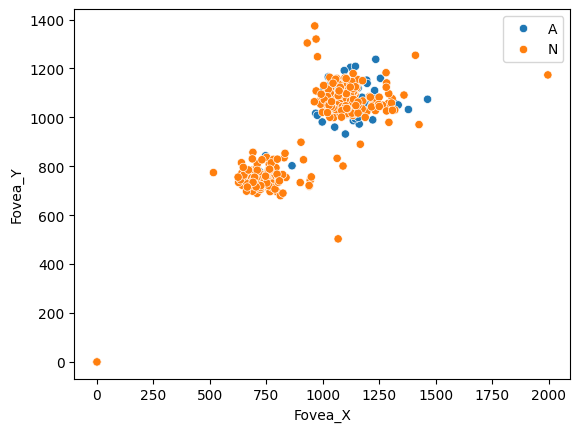

In [4]:
import seaborn as sns
%matplotlib inline

AorN=[imn[0] for imn in labels_df.imgName]
sns.scatterplot(x=labels_df['Fovea_X'], y=labels_df['Fovea_Y'],hue=AorN)

In [5]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt

# fix random seed
np.random.seed(2019)

In [6]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.subplots_adjust(wspace=0, hspace=0.3)
nrows,ncols=2,3

<Figure size 1500x900 with 0 Axes>

In [7]:
# get imgName column
imgName=labels_df["imgName"]

# get ids
ids=labels_df.index

# select random ids
rndIds=np.random.choice(ids,nrows*ncols)
print(rndIds)

[ 73 371 160 294 217 191]


In [8]:
def load_img_label(labels_df,id_):
    imgName=labels_df["imgName"]
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"

    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
    img = Image.open(fullPath2img)

    # centroid
    x=labels_df["Fovea_X"][id_]
    y=labels_df["Fovea_Y"][id_]

    label=(x,y)
    return img,label

In [9]:
def show_img_label(img,label,w_h=(50,50),thickness=2):
    w,h=w_h
    cx,cy=label

    # draw a rectangle
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2, cy+h/2)),outline="green",width=thickness)

    plt.imshow(np.asarray(img))

(2124, 2056) (1037.89889229694, 1115.71768088143)
(1444, 1444) (635.148992978281, 744.648850248249)
(1444, 1444) (639.360312038611, 814.762764100936)
(2124, 2056) (1122.08407442503, 1067.58829793991)
(2124, 2056) (1092.93333646222, 1055.15333296773)
(2124, 2056) (1112.50135915347, 1070.7251775623)


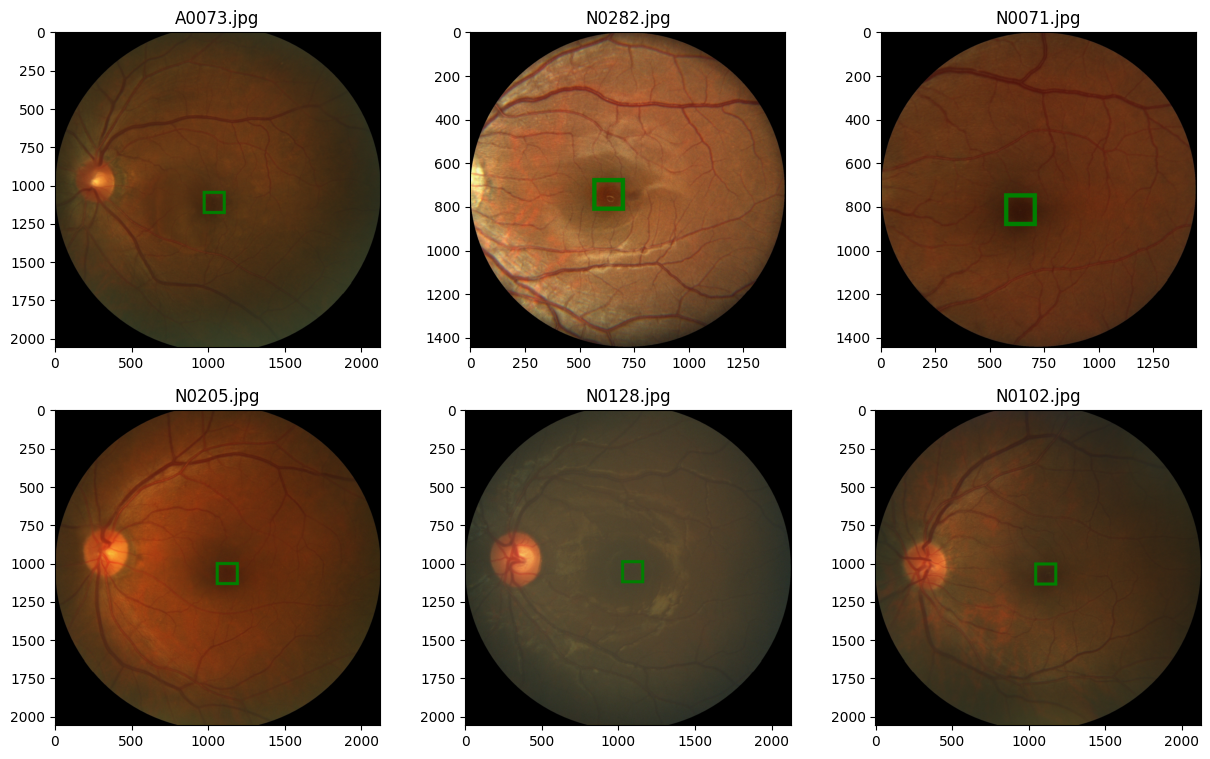

In [10]:
for i,id_ in enumerate(rndIds):

    img,label=load_img_label(labels_df,id_)
    print(img.size,label)

    plt.subplot(nrows, ncols, i+1)
    show_img_label(img,label,w_h=(150,150),thickness=20)
    plt.title(imgName[id_])

In [11]:
h_list,w_list=[],[]
for id_ in ids:
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"

    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])

    # load image
    img = Image.open(fullPath2img)
    h,w=img.size
    h_list.append(h)
    w_list.append(w)

<Axes: ylabel='Count'>

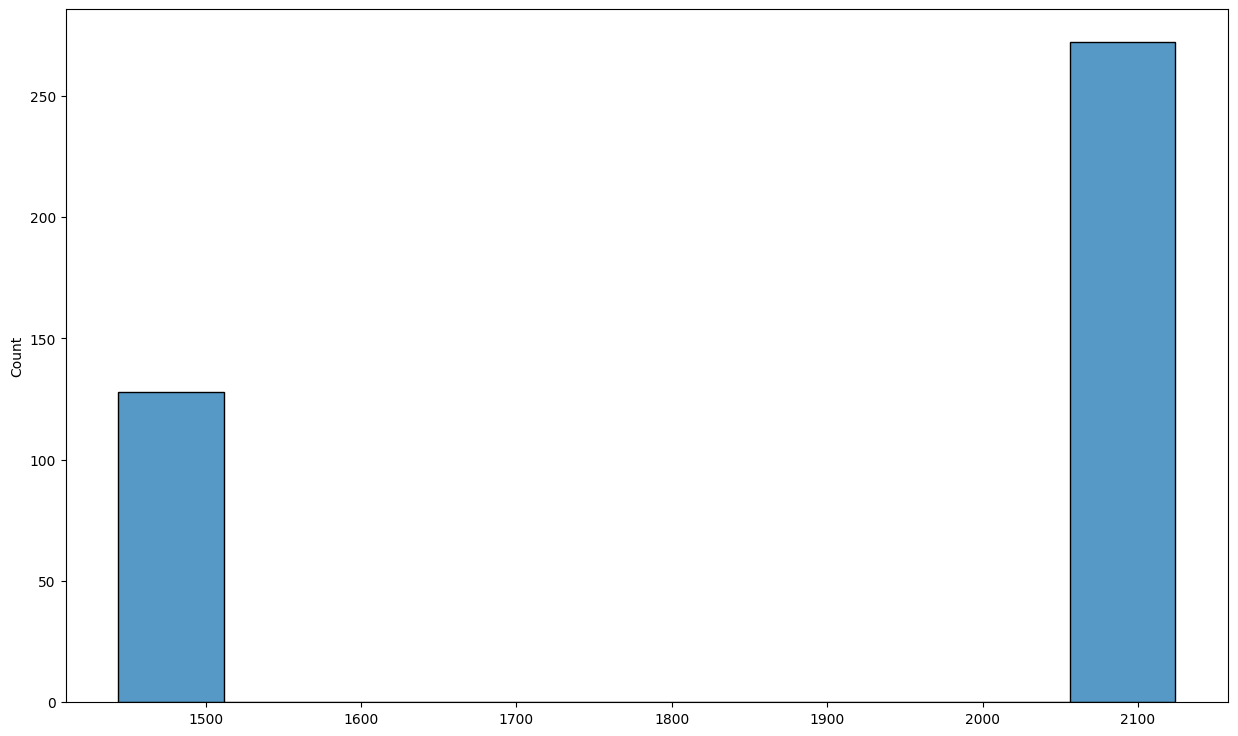

In [18]:
sns.histplot(h_list, kde=False)

<Axes: ylabel='Count'>

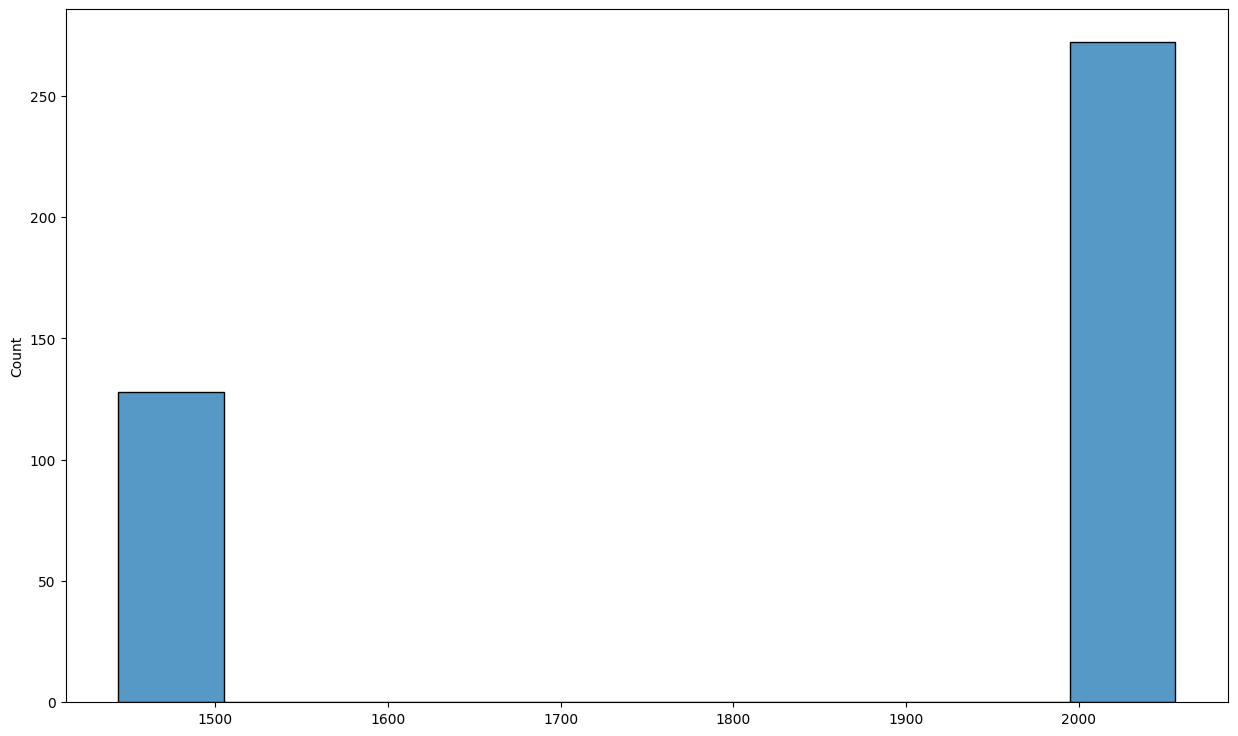

In [19]:
sns.histplot(w_list, kde=False)

# Data Transformation for Object Detection

In [20]:
import torchvision.transforms.functional as TF

def resize_img_label(image,label=(0.,0.),target_size=(256,256)):
    w_orig,h_orig = image.size
    w_target,h_target = target_size
    cx, cy= label

    # resize image and label
    image_new = TF.resize(image,target_size)
    label_new= cx/w_orig*w_target, cy/h_orig*h_target

    return image_new,label_new

(2124, 2056) (1182.26427759023, 1022.01884158854)
(256, 256) (142.4951295024006, 127.25526432230848)


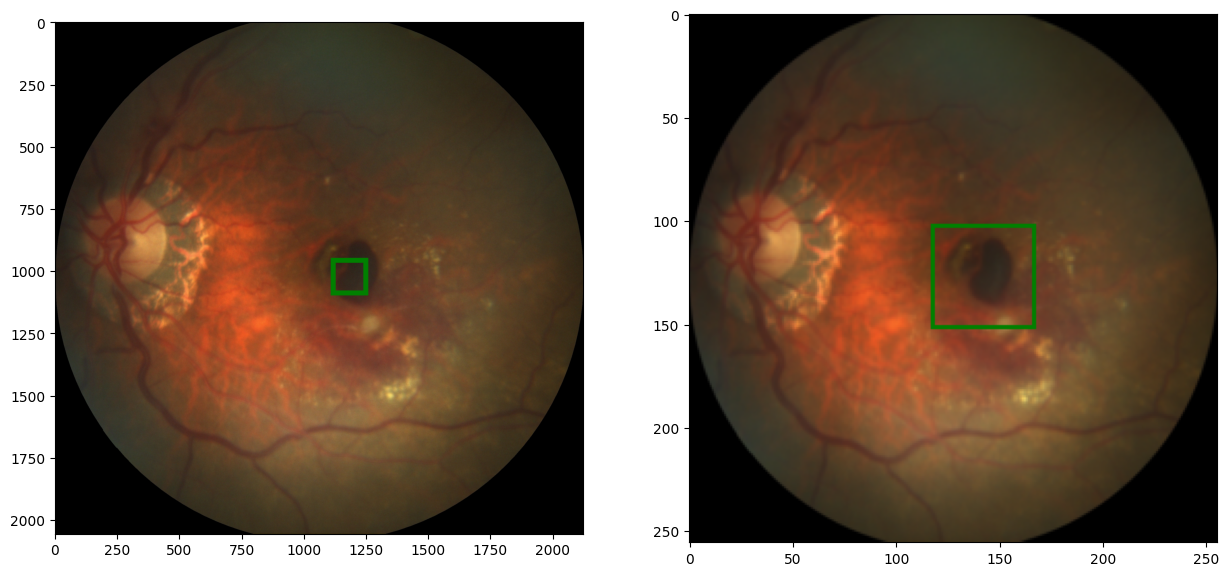

In [21]:
# load image
img, label=load_img_label(labels_df,1)
print(img.size,label)

img_r,label_r=resize_img_label(img,label)
print(img_r.size,label_r)

plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(img_r,label_r)

In [22]:
def random_hflip(image,label):
    w,h=image.size
    x,y=label

    image = TF.hflip(image)
    label = w-x, y
    return image,label

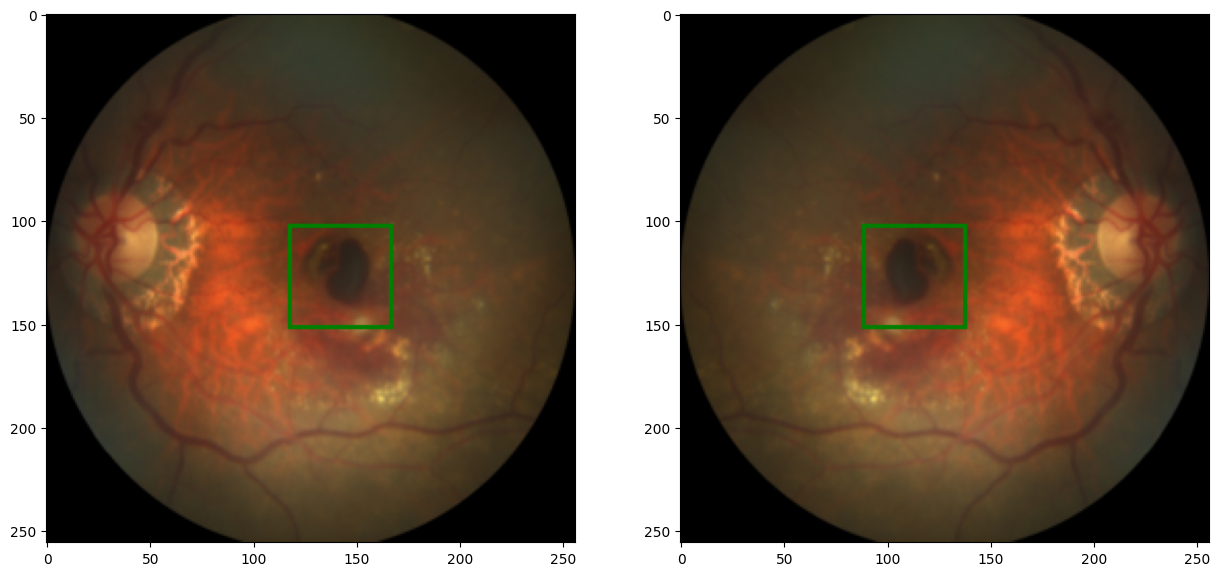

In [23]:
# load image and label
img, label=load_img_label(labels_df,1)

# resize image and label
img_r,label_r=resize_img_label(img,label)

# horizantal flip
img_fh,label_fh=random_hflip(img_r,label_r)

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_fh,label_fh)

In [24]:
def random_vflip(image,label):
    w,h=image.size
    x,y=label

    image = TF.vflip(image)
    label = x, h-y
    return image, label

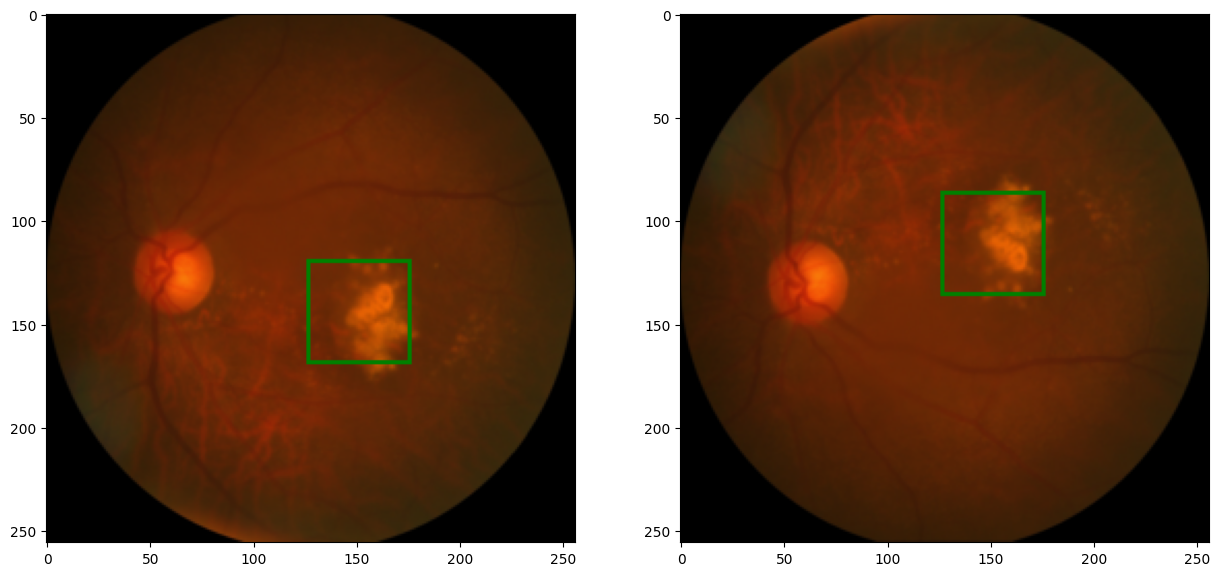

In [25]:
# load image and label
img, label=load_img_label(labels_df,7)

# resize image and label
img_r,label_r=resize_img_label(img,label)

# vertical flip
img_fv,label_fv=random_vflip(img_r,label_r)

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_fv,label_fv)

In [26]:
import numpy as np
np.random.seed(1)

def random_shift(image,label,max_translate=(0.2,0.2)):
    w,h=image.size
    max_t_w, max_t_h=max_translate
    cx, cy=label

    # translate coeficinet, random [-1,1]
    trans_coef=np.random.rand()*2-1
    w_t = int(trans_coef*max_t_w*w)
    h_t = int(trans_coef*max_t_h*h)

    image=TF.affine(image,translate=(w_t, h_t),shear=0,angle=0,scale=1)
    label = cx+w_t, cy+h_t

    return image,label

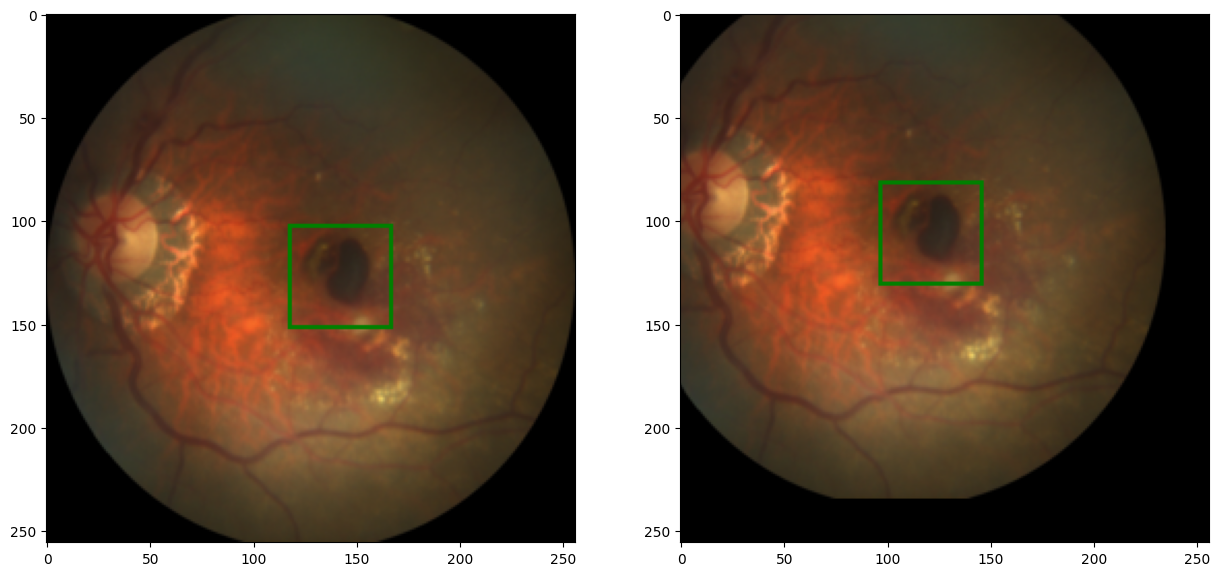

In [27]:
# load image and label
img, label=load_img_label(labels_df,1)

# resize image and label
img_r,label_r=resize_img_label(img,label)

# horizantal flip
img_t,label_t=random_shift(img_r,label_r,max_translate=(.5,.5))

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_t,label_t)

In [28]:
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])

    if random.random() < params["p_hflip"]:
        image,label=random_hflip(image,label)

    if random.random() < params["p_vflip"]:
        image,label=random_vflip(image,label)

    if random.random() < params["p_shift"]:
        image,label=random_shift(image,label, params["max_translate"])

    image=TF.to_tensor(image)
    return image, label

In [29]:
import random
np.random.seed(0)
random.seed(0)

# load image and label
img, label=load_img_label(labels_df,1)

params={
    "target_size" : (256, 256),
    "p_hflip" : 1.0,
    "p_vflip" : 1.0,
    "p_shift" : 1.0,
    "max_translate": (0.2, 0.2),
}
img_t,label_t=transformer(img,label,params)

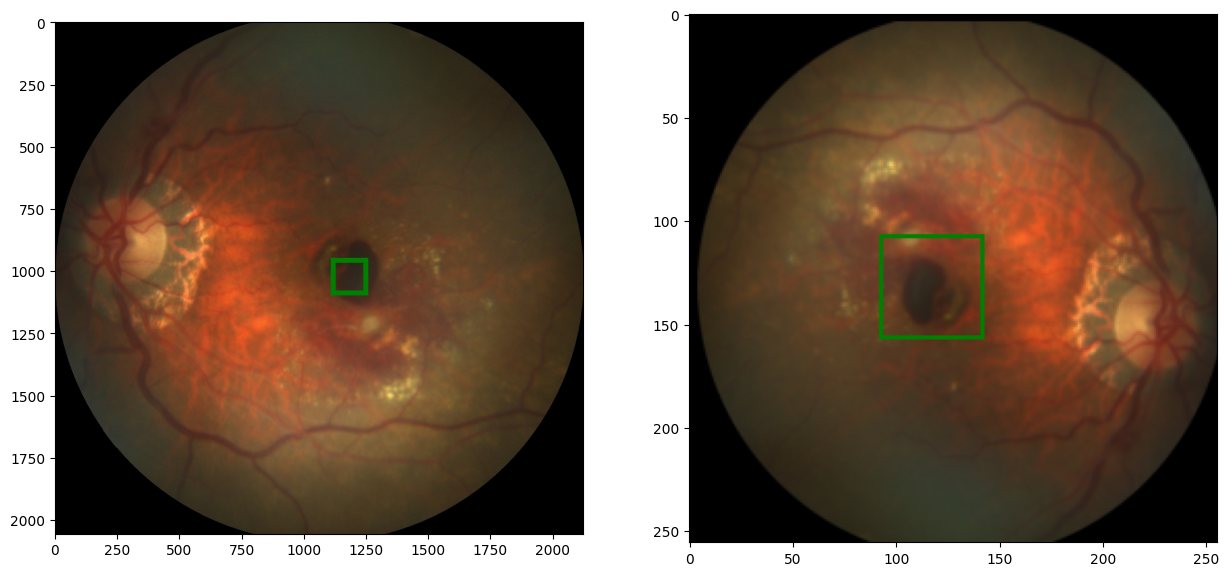

In [30]:
plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(TF.to_pil_image(img_t),label_t)

## There is More

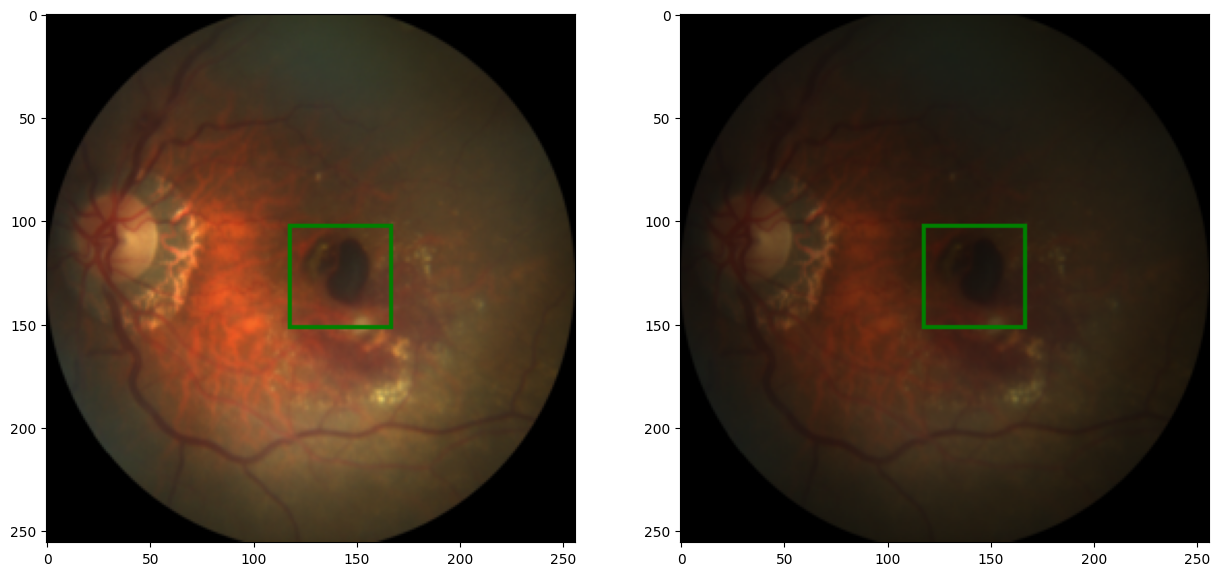

In [31]:
# load image and label
img, label=load_img_label(labels_df,1)

# resize image and label
img_r,label_r=resize_img_label(img,label)

# adjust brightness
img_t=TF.adjust_brightness(img_r,brightness_factor=0.5)
label_t=label_r

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_t,label_t)

In [32]:
# brightness
img_t=TF.adjust_contrast(img_r,contrast_factor=0.4)

# gamma correction
img_t=TF.adjust_gamma(img_r,gamma=1.4)

In [33]:
def scale_label(a,b):
    div = [ai/bi for ai,bi in zip(a,b)]
    return div

In [34]:
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])

    if random.random() < params["p_hflip"]:
        image,label=random_hflip(image,label)

    if random.random() < params["p_vflip"]:
        image,label=random_vflip(image,label)

    if random.random() < params["p_shift"]:
        image,label=random_shift(image,label, params["max_translate"])

    if random.random() < params["p_brightness"]:
        brightness_factor=1+(np.random.rand()*2-1)*params["brightness_factor"]
        image=TF.adjust_brightness(image,brightness_factor)

    if random.random() < params["p_contrast"]:
        contrast_factor=1+(np.random.rand()*2-1)*params["contrast_factor"]
        image=TF.adjust_contrast(image,contrast_factor)

    if random.random() < params["p_gamma"]:
        gamma=1+(np.random.rand()*2-1)*params["gamma"]
        image=TF.adjust_gamma(image,gamma)

    if params["scale_label"]:
        label=scale_label(label,params["target_size"])

    image=TF.to_tensor(image)
    return image, label

In [35]:
np.random.seed(0)
random.seed(0)

# load image and label
img, label=load_img_label(labels_df,1)

In [36]:
params={
    "target_size" : (256, 256),
    "p_hflip" : 1.0,
    "p_vflip" : 1.0,
    "p_shift" : 1.0,
    "max_translate": (0.5, 0.5),
    "p_brightness": 1.0,
    "brightness_factor": 0.8,
    "p_contrast": 1.0,
    "contrast_factor": 0.8,
    "p_gamma": 1.0,
    "gamma": 0.4,
    "scale_label": False,
}
img_t,label_t=transformer(img,label,params)

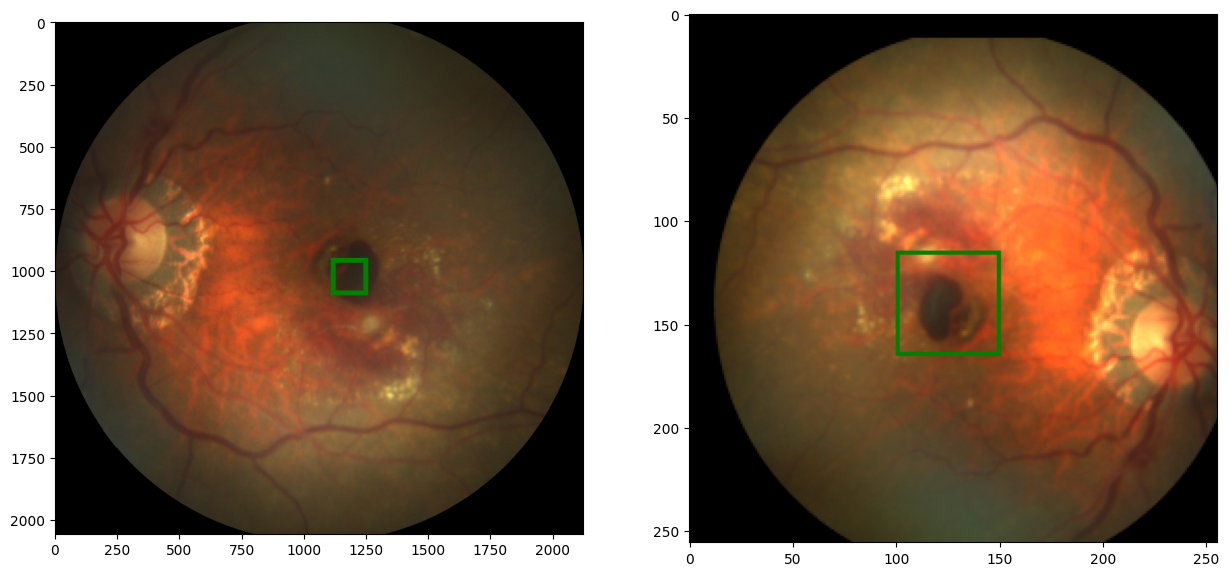

In [37]:
plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(TF.to_pil_image(img_t),label_t)

In [38]:
def rescale_label(a,b):
    div = [ai*bi for ai,bi in zip(a,b)]
    return div

# Creating Custom Datasets

In [39]:
from torch.utils.data import Dataset
from PIL import Image

In [40]:
class AMD_dataset(Dataset):
    def __init__(self, path2data, transform, trans_params):
        pass

    def __len__(self):
        # return size of dataset
        return len(self.labels)

    def __getitem__(self, idx):
        pass

In [56]:
def __init__(self, path2data, transform, trans_params):

    # full path of the labels file
    path2labels = '/content/drive/MyDrive/iChallenge-AMD dataset/Training400/Fovea_location.xlsx'
    # read and extract labels
    labels_df=pd.read_excel(path2labels,index_col="ID")
    self.labels = labels_df[["Fovea_X","Fovea_Y"]].values

    # extract ID and imgName columns
    self.imgName=labels_df["imgName"]
    self.ids=labels_df.index

    self.fullPath2img=[0]*len(self.ids)
    for id_ in self.ids:
        if self.imgName[id_][0]=="A":
            prefix="AMD"
        else:
            prefix="Non-AMD"
        self.fullPath2img[id_-1]=os.path.join(path2data,"Training400",prefix,self.imgName[id_])

    self.transform = transform
    self.trans_params=trans_params

In [57]:
def __getitem__(self, idx):
    # load PIL image
    image = Image.open(self.fullPath2img[idx])
    label= self.labels[idx]

    # transform to tensor
    image,label = self.transform(image,label,self.trans_params)

    return image, label

In [58]:
AMD_dataset.__init__=__init__
AMD_dataset.__getitem__=__getitem__

In [59]:
trans_params_train={
    "target_size" : (256, 256),
    "p_hflip" : 0.5,
    "p_vflip" : 0.5,
    "p_shift" : 0.5,
    "max_translate": (0.2, 0.2),
    "p_brightness": 0.5,
    "brightness_factor": 0.2,
    "p_contrast": 0.5,
    "contrast_factor": 0.2,
    "p_gamma": 0.5,
    "gamma": 0.2,
    "scale_label": True,
}


In [60]:
trans_params_val={
    "target_size" : (256, 256),
    "p_hflip" : 0.0,
    "p_vflip" : 0.0,
    "p_shift" : 0.0,
    "p_brightness": 0.0,
    "p_contrast": 0.0,
    "p_gamma": 0.0,
    "gamma": 0.0,
    "scale_label": True,
}

In [61]:
amd_ds1=AMD_dataset(path2data,transformer,trans_params_train)
amd_ds2=AMD_dataset(path2data,transformer,trans_params_val)

In [62]:
from sklearn.model_selection import ShuffleSplit

sss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=range(len(amd_ds1))

for train_index, val_index in sss.split(indices):
    print(len(train_index))
    print("-"*10)
    print(len(val_index))

320
----------
80


In [63]:
from torch.utils.data import Subset

train_ds=Subset(amd_ds1,train_index)
print(len(train_ds))

val_ds=Subset(amd_ds2,val_index)
print(len(val_ds))

320
80


In [64]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# fix random seed
np.random.seed(0)

In [65]:
def show(img,label=None):
    npimg = img.numpy().transpose((1,2,0))
    plt.imshow(npimg)
    if label is not None:
        label=rescale_label(label,img.shape[1:])
        x,y=label
        plt.plot(x,y,'b+',markersize=20)

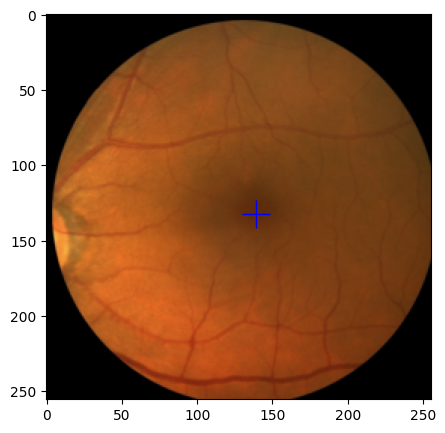

In [66]:
plt.figure(figsize=(5,5))
for img,label in train_ds:
    show(img,label)
    break

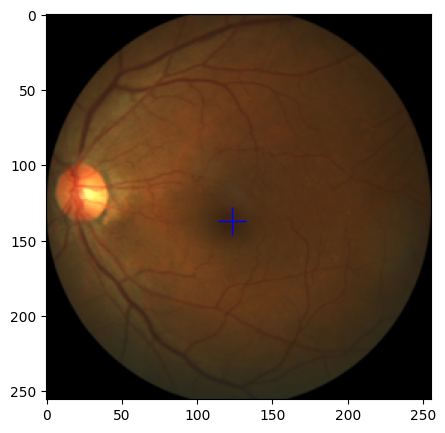

In [67]:
plt.figure(figsize=(5,5))
for img,label in val_ds:
    show(img,label)
    break

In [68]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)

In [69]:
for img_b, label_b in train_dl:
    print(img_b.shape,img_b.dtype)
    print(label_b)
    break

torch.Size([8, 3, 256, 256]) torch.float32
[tensor([0.5637, 0.5801, 0.5169, 0.5059, 0.6392, 0.4051, 0.5128, 0.4840],
       dtype=torch.float64), tensor([0.6298, 0.5327, 0.5498, 0.4698, 0.6168, 0.5107, 0.5733, 0.5448],
       dtype=torch.float64)]


In [70]:
import torch

# extract a batch from trainin data
for img_b, label_b in train_dl:
    print(img_b.shape,img_b.dtype)

    # convert list to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    print(label_b.shape,label_b.dtype)
    break

torch.Size([8, 3, 256, 256]) torch.float32
torch.Size([8, 2]) torch.float32


In [71]:
for img_b, label_b in val_dl:
    print(img_b.shape,img_b.dtype)

    # convert to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    print(label_b.shape,label_b.dtype)
    break

torch.Size([16, 3, 256, 256]) torch.float32
torch.Size([16, 2]) torch.float32


# Creating the Model

In [72]:
import torch.nn as nn
import torch.nn.functional as F

In [73]:
class Net(nn.Module):
    def __init__(self, params):
        super(Net, self).__init__()

    def forward(self, x):
        return x

In [74]:
def __init__(self, params):
    super(Net, self).__init__()

    C_in,H_in,W_in=params["input_shape"]
    init_f=params["initial_filters"]
    num_outputs=params["num_outputs"]

    self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3,stride=2,padding=1)
    self.conv2 = nn.Conv2d(init_f+C_in, 2*init_f, kernel_size=3,stride=1,padding=1)
    self.conv3 = nn.Conv2d(3*init_f+C_in, 4*init_f, kernel_size=3,padding=1)
    self.conv4 = nn.Conv2d(7*init_f+C_in, 8*init_f, kernel_size=3,padding=1)
    self.conv5 = nn.Conv2d(15*init_f+C_in, 16*init_f, kernel_size=3,padding=1)
    self.fc1 = nn.Linear(16*init_f, num_outputs)

In [75]:
def forward(self, x):
    identity=F.avg_pool2d(x,4,4)
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    x = F.relu(self.conv5(x))

    x=F.adaptive_avg_pool2d(x,1)
    x = x.reshape(x.size(0), -1)

    x = self.fc1(x)
    return x

In [76]:
Net.__init__=__init__
Net.forward=forward

In [77]:
params_model={
        "input_shape": (3,256,256),
        "initial_filters": 16,
        "num_outputs": 2,
            }

model = Net(params_model)

In [78]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    model=model.to(device)

In [79]:
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(19, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(51, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(115, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(243, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=2, bias=True)
)


# Defining Loss, Optimizer and IOU Metric

In [80]:
loss_func = nn.SmoothL1Loss(reduction="sum")

In [81]:
n,c=8,2
y = 0.5 * torch.ones(n, c, requires_grad=True)
print(y.shape)

target = torch.zeros(n, c, requires_grad=False)
print(target.shape)

loss = loss_func(y, target)
print(loss.item())

y = 2 * torch.ones(n, c, requires_grad=True)
target = torch.zeros(n, c, requires_grad=False)
loss = loss_func(y, target)
print(loss.item())

torch.Size([8, 2])
torch.Size([8, 2])
2.0
24.0


In [82]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=3e-4)

In [83]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

current_lr=get_lr(opt)
print('current lr={}'.format(current_lr))

current lr=0.0003


In [84]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [85]:
for i in range(100):
    lr_scheduler.step(1)

In [86]:
def cxcy2bbox(cxcy,w=50./256,h=50./256):
    # define two new tensors for w and h
    w_tensor=torch.ones(cxcy.shape[0],1,device=cxcy.device)*w
    h_tensor=torch.ones(cxcy.shape[0],1,device=cxcy.device)*h

    # extract cx and cy
    cx=cxcy[:,0].unsqueeze(1)
    cy=cxcy[:,1].unsqueeze(1)

    # concat cx,cy,w and h
    boxes=torch.cat((cx,cy, w_tensor, h_tensor), -1) # cx,cy,w,h

    return torch.cat((boxes[:, :2] - boxes[:, 2:]/2, # xmin, ymin
                     boxes[:, :2] + boxes[:, 2:]/2), 1) # xmax, ymax

In [87]:
torch.manual_seed(0)

cxcy=torch.rand(1,2)
print("center:", cxcy*256)

bb=cxcy2bbox(cxcy)
print("bounding box", bb*256)

center: tensor([[127.0417, 196.6648]])
bounding box tensor([[102.0417, 171.6648, 152.0417, 221.6648]])


In [88]:
import torchvision
def metrics_batch(output, target):
    output=cxcy2bbox(output)
    target=cxcy2bbox(target)

    iou=torchvision.ops.box_iou(output, target)
    return torch.diagonal(iou, 0).sum().item()

In [89]:
n,c=8,2
target = torch.rand(n, c, device=device)
target=cxcy2bbox(target)
metrics_batch(target,target)

8.0

In [90]:
def loss_batch(loss_func, output, target, opt=None):
    # get loss
    loss = loss_func(output, target)

    # get performance metric
    metric_b = metrics_batch(output,target)

    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

In [91]:
for xb,label_b in train_dl:
    # convert to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    label_b=label_b.to(device)

    l,m=loss_batch(loss_func,label_b,label_b)
    print(l,m)
    break

0.0 8.0


# Training and Evaluation of the Model

In [92]:
def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        # convert to tensor
        yb=torch.stack(yb,1)
        yb=yb.type(torch.float32).to(device)

        # get model output
        output=model(xb.to(device))

        # get loss per batch
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt)

        # update running loss
        running_loss+=loss_b

        # update running metric
        if metric_b is not None:
            running_metric+=metric_b

    # average loss value
    loss=running_loss/float(len_data)

    # average metric value
    metric=running_metric/float(len_data)

    return loss, metric


In [93]:
import copy
def train_val(model, params):
    # extract parameters
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]

    # history of loss values in each epoch
    loss_history={
        "train": [],
        "val": [],
    }

    # histroy of metric values in each epoch
    metric_history={
        "train": [],
        "val": [],
    }


    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict())

    # initialize best loss to a large value
    best_loss=float('inf')

    for epoch in range(num_epochs):
        # get current learning rate
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))

        # train the model
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,sanity_check,opt)

        # collect loss and metric for training dataset
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)

        # evaluate the model
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,sanity_check)

        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)


        # store best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())

            # store weights into a local file
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")

        # learning rate schedule
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts)


        print("train loss: %.6f, accuracy: %.2f" %(train_loss,100*train_metric))
        print("val loss: %.6f, accuracy: %.2f" %(val_loss,100*val_metric))
        print("-"*10)


    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history

In [94]:
loss_func=nn.SmoothL1Loss(reduction="sum")
opt = optim.Adam(model.parameters(), lr=1e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

path2models= "./models/"
if not os.path.exists(path2models):
        os.mkdir(path2models)

params_train={
    "num_epochs": 100,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": path2models+"weights_smoothl1.pt",
}

# train and validate the model
model,loss_hist,metric_hist=train_val(model,params_train)

Epoch 0/99, current lr=0.0001
Copied best model weights!
train loss: 0.071685, accuracy: 13.37
val loss: 0.021696, accuracy: 21.78
----------
Epoch 1/99, current lr=0.0001
Copied best model weights!
train loss: 0.016741, accuracy: 25.58
val loss: 0.014450, accuracy: 36.97
----------
Epoch 2/99, current lr=0.0001
Copied best model weights!
train loss: 0.011447, accuracy: 33.25
val loss: 0.011116, accuracy: 44.07
----------
Epoch 3/99, current lr=0.0001
train loss: 0.010055, accuracy: 33.51
val loss: 0.011165, accuracy: 45.60
----------
Epoch 4/99, current lr=0.0001
train loss: 0.009068, accuracy: 37.09
val loss: 0.011418, accuracy: 34.42
----------
Epoch 5/99, current lr=0.0001
Copied best model weights!
train loss: 0.008451, accuracy: 37.50
val loss: 0.009444, accuracy: 58.39
----------
Epoch 6/99, current lr=0.0001
train loss: 0.007976, accuracy: 42.39
val loss: 0.009498, accuracy: 51.83
----------
Epoch 7/99, current lr=0.0001
train loss: 0.006892, accuracy: 41.12
val loss: 0.009740,

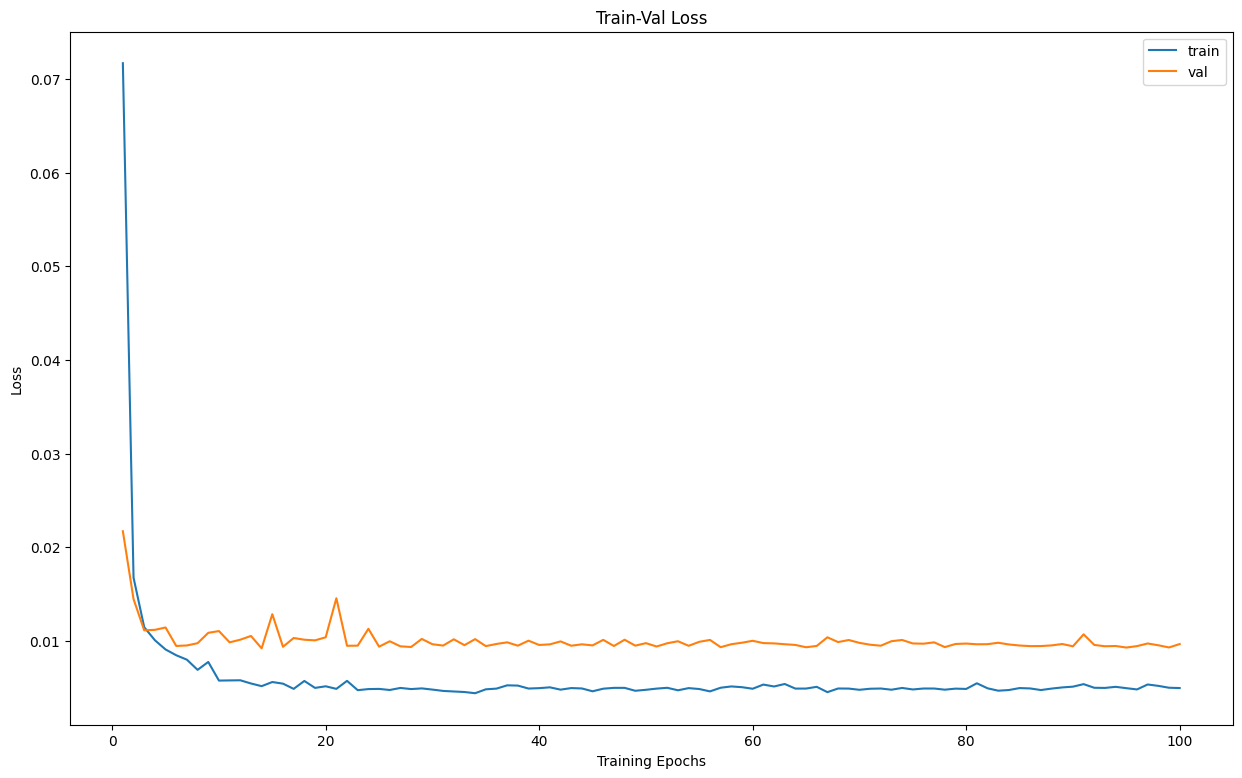

In [95]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]

# plot loss progress
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

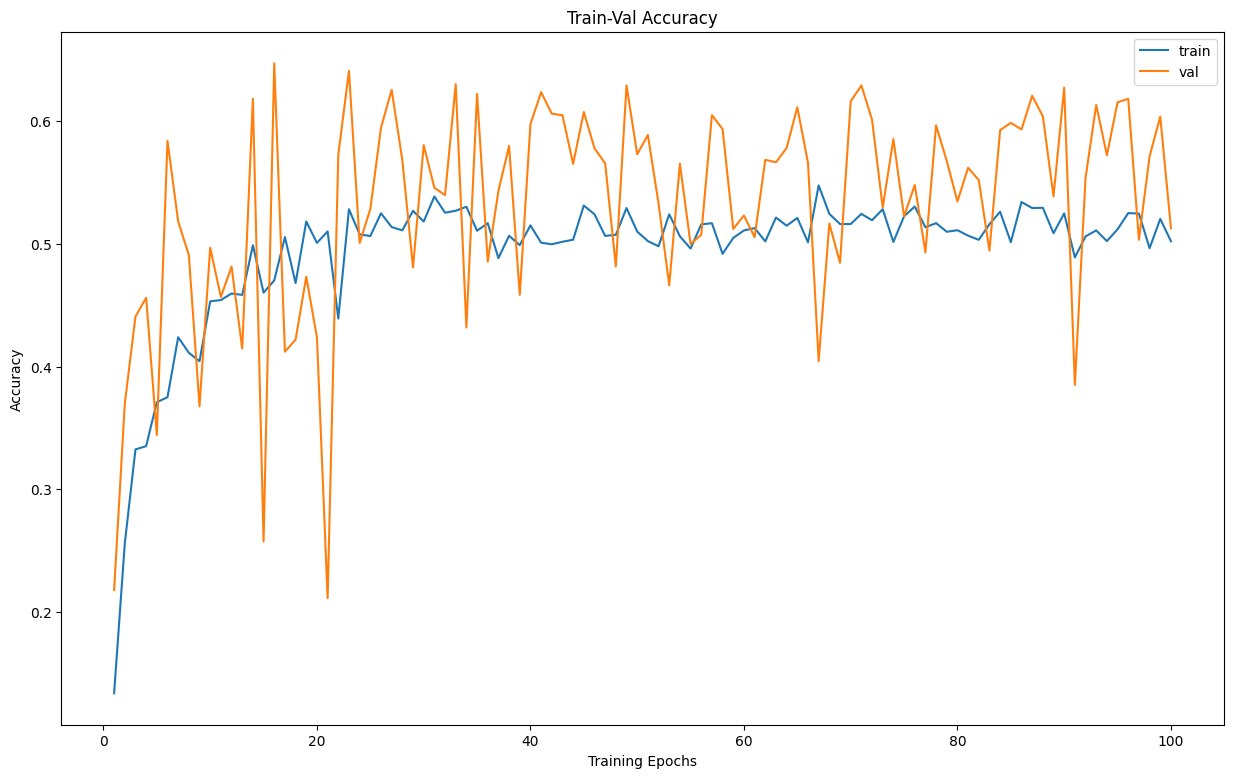

In [96]:
# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

In [97]:
import torchvision
torchvision.__version__

'0.18.0+cu121'

# Creating Dataset

In [98]:
def scale_label(a,b):
    div = [ai/bi for ai,bi in zip(a,b)]
    return div

def rescale_label(a,b):
    div = [ai*bi for ai,bi in zip(a,b)]
    return div

In [99]:
import torchvision.transforms.functional as TF

def resize_img_label(image,label=(0.,0.),target_size=(256,256)):
    w_orig,h_orig = image.size
    w_target,h_target = target_size
    cx, cy= label

    # resize image and label
    image_new = TF.resize(image,target_size)
    label_new= cx/w_orig*w_target, cy/h_orig*h_target

    return image_new,label_new

In [100]:
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])

    if params["scale_label"]:
        label=scale_label(label,params["target_size"])

    image=TF.to_tensor(image)
    return image, label

In [101]:
from torch.utils.data import Dataset
from PIL import Image

In [102]:
class AMD_dataset(Dataset):
    def __init__(self, path2data, transform, trans_params):
        pass

    def __len__(self):
        # return size of dataset
        return len(self.labels)

    def __getitem__(self, idx):
        pass

In [110]:
def __init__(self, path2data, transform, trans_params):

    # full path of the labels file
    path2labels= '/content/drive/MyDrive/iChallenge-AMD dataset/Training400/Fovea_location.xlsx'

    # read labels as a data frame
    labels_df=pd.read_excel(path2labels,index_col="ID")

    # extract labels
    self.labels = labels_df[["Fovea_X","Fovea_Y"]].values

    # extract ID and imgName columns
    self.imgName=labels_df["imgName"]
    self.ids=labels_df.index

    self.fullPath2img=[0]*len(self.ids)
    for id_ in self.ids:
        if self.imgName[id_][0]=="A":
            prefix="AMD"
        else:
            prefix="Non-AMD"

        self.fullPath2img[id_-1]=os.path.join(path2data,"Training400",prefix,self.imgName[id_])

    self.transform = transform
    self.trans_params=trans_params

In [111]:
def __getitem__(self, idx):
    # load PIL image
    image = Image.open(self.fullPath2img[idx])
    label= self.labels[idx]

    # transform to tensor
    image,label = self.transform(image,label,self.trans_params)

    return image, label

In [112]:
AMD_dataset.__init__=__init__
AMD_dataset.__getitem__=__getitem__

In [113]:
path2data="/content/drive/MyDrive/iChallenge-AMD dataset"

trans_params_val={
    "target_size" : (256, 256),
    "p_hflip" : 0.0,
    "p_vflip" : 0.0,
    "p_shift" : 0.0,
    "p_brightness": 0.0,
    "p_contrast": 0.0,
    "p_gamma": 0.0,
    "gamma": 0.0,
    "scale_label": True,
}
amd_ds2=AMD_dataset(path2data,transformer,trans_params_val)

In [114]:
from sklearn.model_selection import ShuffleSplit

sss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=range(len(amd_ds2))

for train_index, val_index in sss.split(indices):
    print(len(train_index))
    print("-"*10)
    print(len(val_index))

320
----------
80


In [115]:
from torch.utils.data import Subset
val_ds=Subset(amd_ds2,val_index)
print(len(val_ds))

80


# Building Model

In [116]:
import torch.nn as nn
import torch.nn.functional as F

In [117]:
class Net(nn.Module):
    def __init__(self, params):
        super(Net, self).__init__()

    def forward(self, x):
        return x

In [118]:
def __init__(self, params):
    super(Net, self).__init__()

    C_in,H_in,W_in=params["input_shape"]
    init_f=params["initial_filters"]
    num_outputs=params["num_outputs"]

    self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3,stride=2,padding=1)
    self.conv2 = nn.Conv2d(init_f+C_in, 2*init_f, kernel_size=3,stride=1,padding=1)
    self.conv3 = nn.Conv2d(3*init_f+C_in, 4*init_f, kernel_size=3,padding=1)
    self.conv4 = nn.Conv2d(7*init_f+C_in, 8*init_f, kernel_size=3,padding=1)
    self.conv5 = nn.Conv2d(15*init_f+C_in, 16*init_f, kernel_size=3,padding=1)
    self.fc1 = nn.Linear(16*init_f, num_outputs)


In [119]:
def forward(self, x):
    identity=F.avg_pool2d(x,4,4)
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    x = F.relu(self.conv5(x))

    x=F.adaptive_avg_pool2d(x,1)
    x = x.reshape(x.size(0), -1)

    x = self.fc1(x)
    return x

In [120]:
Net.__init__=__init__
Net.forward=forward

In [121]:
params_model={
        "input_shape": (3,256,256),
        "initial_filters": 16,
        "num_outputs": 2,
            }
# create model
model = Net(params_model)
model.eval()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(19, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(51, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(115, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(243, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=2, bias=True)
)

In [122]:
# move model to cuda/gpu device
if torch.cuda.is_available():
    device = torch.device("cuda")
    model=model.to(device)

# Deployment

## Load weights

In [124]:
path2weights="/content/models/weights_smoothl1.pt"
model.load_state_dict(torch.load(path2weights))

<All keys matched successfully>

In [125]:
# define device as a global variable
device = torch.device("cuda")

def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        # convert to tensor
        yb=torch.stack(yb,1)
        yb=yb.type(torch.float32).to(device)

        # get model output
        output=model(xb.to(device))

        # get loss per batch
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt)

        # update running loss
        running_loss+=loss_b

        # update running metric
        if metric_b is not None:
            running_metric+=metric_b

        # break the loop for sanity check
        if sanity_check is True:
            break

    # average loss value
    loss=running_loss/float(len_data)

    # average metric value
    metric=running_metric/float(len_data)

    return loss, metric

In [126]:
def cxcy2bbox(cxcy,w=50./256,h=50./256):
    # define two new tensors for w and h
    w_tensor=torch.ones(cxcy.shape[0],1,device=cxcy.device)*w
    h_tensor=torch.ones(cxcy.shape[0],1,device=cxcy.device)*h

    # extract cx and cy
    cx=cxcy[:,0].unsqueeze(1)
    cy=cxcy[:,1].unsqueeze(1)

    # concat cx,cy,w and h
    boxes=torch.cat((cx,cy, w_tensor, h_tensor), -1)  # cx,cy,w,h

    return torch.cat((boxes[:, :2] - boxes[:, 2:]/2,     # xmin, ymin
                     boxes[:, :2] + boxes[:, 2:]/2), 1)  # xmax, ymax

In [127]:
def metrics_batch(output, target):
    output=cxcy2bbox(output)
    target=cxcy2bbox(target)

    iou=torchvision.ops.box_iou(output, target)
    return torch.diagonal(iou, 0).sum().item()

In [128]:
def loss_batch(loss_func, output, target, opt=None):

    # get loss
    loss = loss_func(output, target)

    # get performance metric
    metric_b = metrics_batch(output,target)

    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

## Verify

In [129]:
loss_func=nn.SmoothL1Loss(reduction="sum")

with torch.no_grad():
    loss,metric=loss_epoch(model,loss_func,val_dl)
print(loss,metric)

0.00918925206642598 0.6182779908180237


In [130]:
from PIL import ImageDraw
import numpy as np
import torchvision.transforms.functional as tv_F
np.random.seed(0)

import matplotlib.pylab as plt
%matplotlib inline

In [131]:
def show_tensor_2labels(img,label1,label2,w_h=(50,50)):
    label1=rescale_label(label1,img.shape[1:])
    label2=rescale_label(label2,img.shape[1:])
    img=tv_F.to_pil_image(img)

    w,h=w_h
    cx,cy=label1
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2, cy+h/2)),outline="green",width=2)

    cx,cy=label2
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2, cy+h/2)),outline="red",width=2)

    plt.imshow(np.asarray(img))

In [132]:
# get random samples
rndInds=np.random.randint(len(val_ds),size=10)
print(rndInds)

[44 47 64 67 67  9 21 36 70 12]


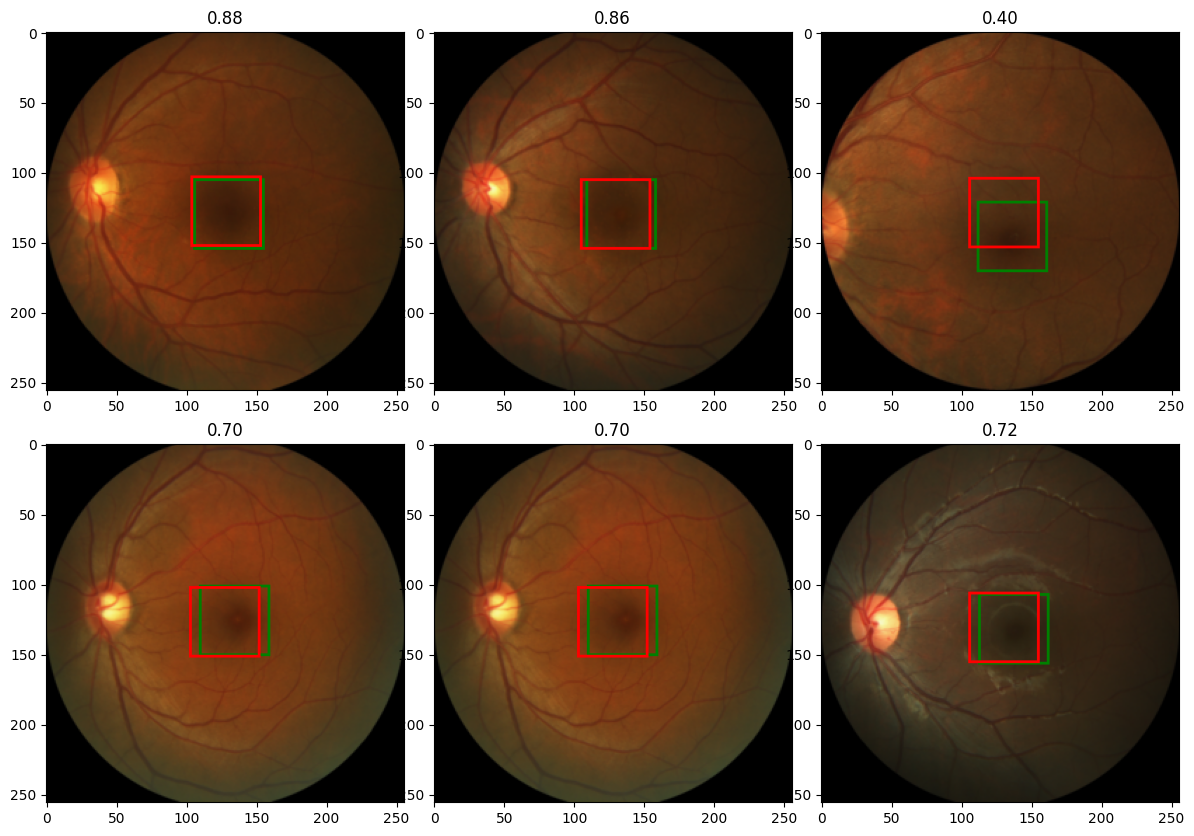

In [133]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.subplots_adjust(wspace=0.0, hspace=0.15)

for i,rndi in enumerate(rndInds):
    img,label=val_ds[rndi]
    h,w=img.shape[1:]
    with torch.no_grad():
        label_pred=model(img.unsqueeze(0).to(device))[0].cpu()

    plt.subplot(2,3,i+1)
    show_tensor_2labels(img,label,label_pred)

    # calculate IOU
    label_bb=cxcy2bbox(torch.tensor(label).unsqueeze(0))
    label_pred_bb=cxcy2bbox(label_pred.unsqueeze(0))
    iou=torchvision.ops.box_iou(label_bb, label_pred_bb)
    plt.title("%.2f" %iou.item())

    if i>4:
        break

In [134]:
def load_img_label(labels_df,id_):
    imgName=labels_df["imgName"]
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"

    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
    img = Image.open(fullPath2img)

    # centroid
    x=labels_df["Fovea_X"][id_]
    y=labels_df["Fovea_Y"][id_]

    label=(x,y)
    return img,label

(2124, 2056) (1182.26427759023, 1022.01884158854)
(256, 256) (142.4951295024006, 127.25526432230848)
torch.Size([3, 256, 256])


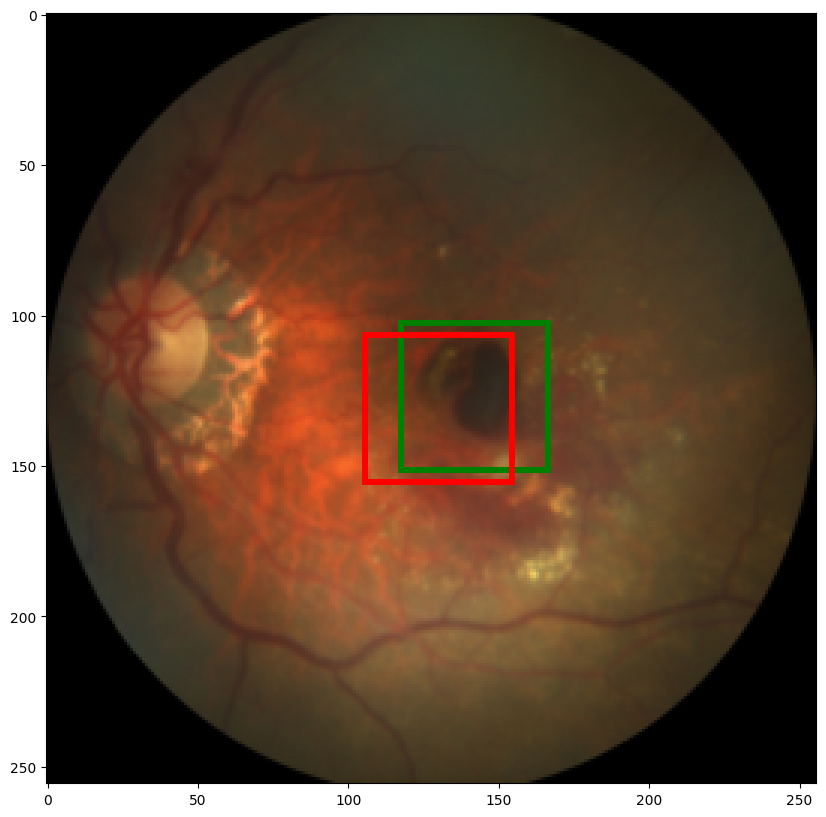

In [135]:
path2labels=os.path.join(path2data,"Training400","Fovea_location.xlsx")
labels_df=pd.read_excel(path2labels,index_col="ID")

img,label=load_img_label(labels_df,1)
print(img.size, label)

img,label=resize_img_label(img,label,target_size=(256,256))
print(img.size, label)

img=TF.to_tensor(img)
label=scale_label(label,(256,256))
print(img.shape)

with torch.no_grad():
    label_pred=model(img.unsqueeze(0).to(device))[0].cpu()

show_tensor_2labels(img,label,label_pred)

In [136]:
import time
elapsed_times=[]
with torch.no_grad():
    for k in range(100):
        start=time.time()
        label_pred=model(img.unsqueeze(0).to(device))[0].cpu()
        elapsed=time.time()-start
        elapsed_times.append(elapsed)
print("inference time per image: %.4f s" %np.mean(elapsed_times))

inference time per image: 0.0021 s
